# Assignment_3 DT

**Name: Yara Hossam El-Din**

**Sec: 2**

**BN: 48**

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Part 1 Decision Tree


In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

## Q1 Plot decision tree using export_graphviz

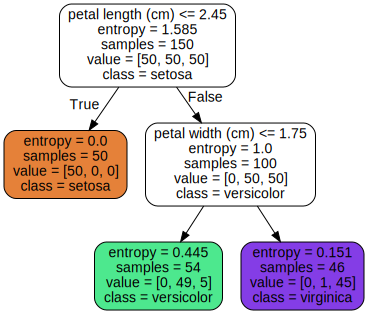

In [3]:
# Answer:

from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join("./", "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join("./", "iris_tree.dot"))



## Q2 Plotting decision boundaries

Use the following function to plot the decision boundaries of DT from Q1

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

Plotting for max_depth = 2

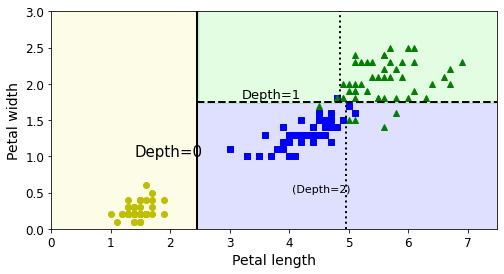

In [5]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### Q2.1
- Train the decision tree using a maximum depth of 1.
- Plot the decision tree using graphviz
- Use the above function to plot the decision boundaries

**Question**
1. After plotting the resulting tree.
    - What's the output entropy in each block?
    - Comment on the entropy values in each block.
2. What's the difference in decision trees between using max_depth = 1, max_depth = 2, max_depth = 10? *Hint: Plot the tree in each case*

**Answer**

*1*. the entropy for the whole dataset is 1.585 .. but the entropy at level 1 is zero for the subset with sitosa class and 1 for the subset with versicolor class.

At first we notice a very high entropy for the complete dataset which makes sense as it contains all three classes of flowers together so the randomness is at its peak. but at level one we start to notice a reduction in entropy, the flowers with petal length<=2.45 cm all belong to the detosa class so there's no randomness in this subset. finally, for the block where petal length>2.45, we see an entropy of 1 as the class could be either versicolor or virginicia.

*2*. the higher the parameter "max_depth" is, the more complex our model gets. as it continues to split internal nodes and reduce entropy until either entropy=0 or "max_depth" is reached.

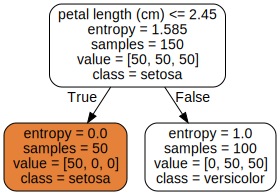

In [6]:
####### YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
tree_depth_1 = DecisionTreeClassifier(max_depth=1, random_state=42, criterion='entropy')
tree_depth_1.fit(X, y)

# plot tree with max_depth=1:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_depth_1,
        out_file=os.path.join("./", "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join("./", "iris_tree.dot"))



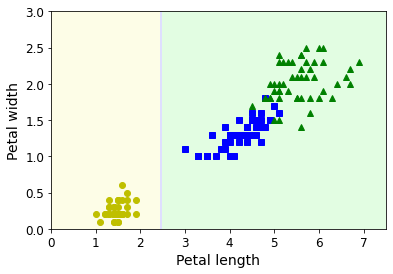

In [7]:
#decision boundaries for depth=1
plot_decision_boundary(tree_depth_1, X, y)


plt.show()

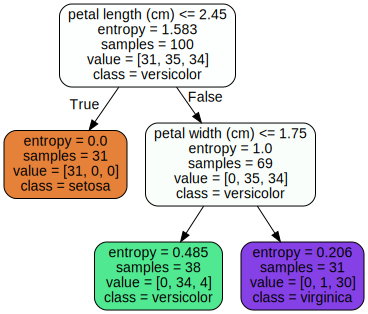

In [8]:
# plot tree with max_depth=2:
tree_depth_2 = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_depth_2.fit(X_train, y_train)
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_depth_2,
        out_file=os.path.join("./", "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join("./", "iris_tree.dot"))



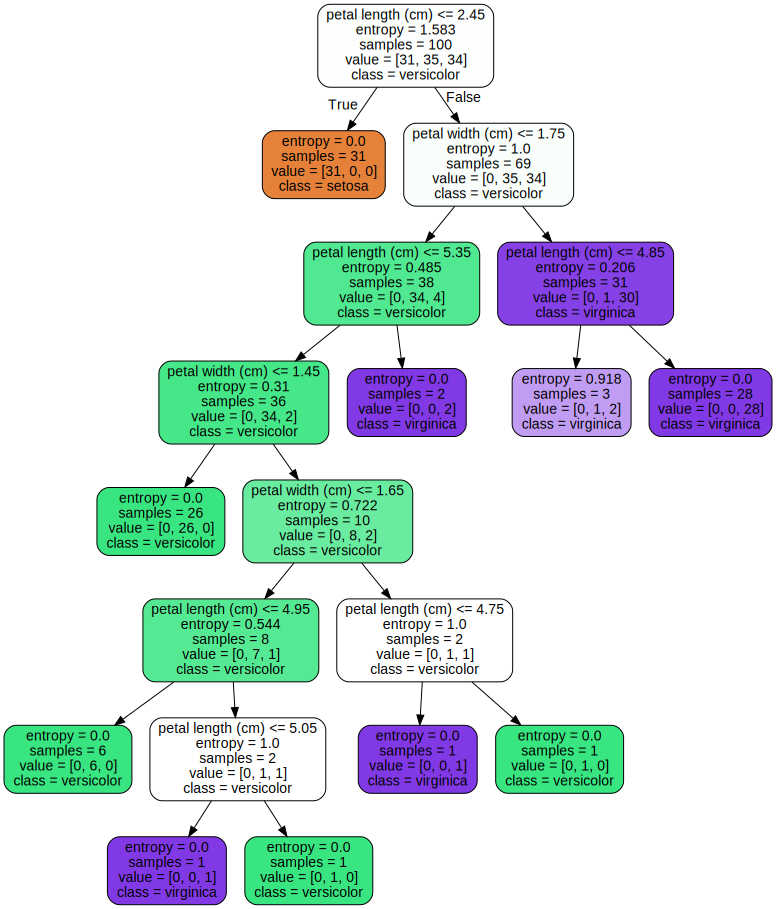

In [9]:
# plot tree with max_depth=10:
tree_depth_10 = DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy')
tree_depth_10.fit(X_train, y_train)
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_depth_10,
        out_file=os.path.join("./", "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join("./", "iris_tree.dot"))



### Q2.2

**Question**
1. Calculate probabilities of all classes on this data point X = [[5, 1.5]] using decision tree with max_depth = 2
2. Compare your result with "predict_proba" function.

**Answer**
1. 

In [10]:
#if we perform manual calculation for probabilities, we see that it matches the o/p of the predict_proba function

######### Your code for (2.)
tree_depth_2 = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_depth_2.fit(X_train,y_train)
tree_depth_2.predict_proba([[5, 1.5]],check_input=True)

array([[0.        , 0.89473684, 0.10526316]])

## Question 3 Sensitivity to data

### Q3.1 Decision Tree
**Question**
1. Fit a decision tree classifier max_depth = 2, to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

score:  0.95


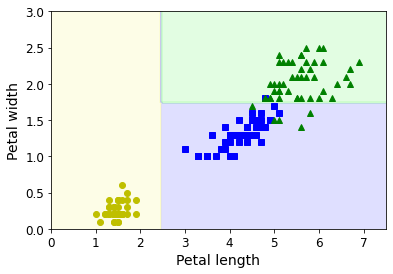

In [11]:
##### YOUR CODE HERE
X = iris.data[:, 2:] # petal length and width
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
tree_depth_2 = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_depth_2.fit(X, y)
plot_decision_boundary(tree_depth_2, X, y)
print("score: ",tree_depth_2.score(X_train,y_train))

The following cell rotates the data by angle 20

In [12]:
X = iris.data[:, 2:] # petal length and width
y = iris.target
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

**Question**
1. Fit another decision tree classifier max_depth = 2, to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

score:  0.96


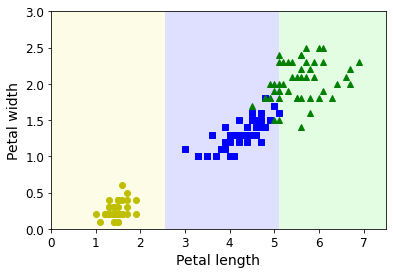

In [13]:
##### YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(Xr, y, test_size=0.33, random_state=42)
tree_depth_2_rot = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_depth_2_rot.fit(Xr,y)
plot_decision_boundary(tree_depth_2_rot, X, y)
print("score: ",tree_depth_2_rot.score(X_train,y_train))

### Q3.2 Logistic Regression
The following function plots the decision boundaries for a logistic regression classifier

In [14]:
import numpy as np
def plot_logistic_regression(clf, X, y, iris=True):

  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = 0.02  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
  plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
  
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
  else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  plt.legend(loc="lower right", fontsize=14)
  plt.show()

**Question**

1. Fit a logistic regression classifier to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

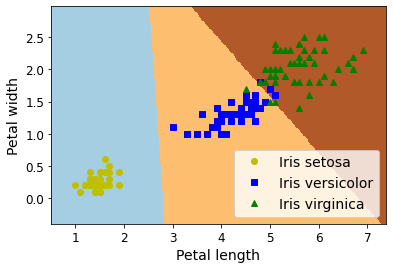

score:  0.67


In [15]:
##### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
X = iris.data[:, 2:] # petal length and width
y = iris.target
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X,y)
plot_logistic_regression(log_reg,X,y)
print("score: ",log_reg.score(X_train,y_train))

**Question**
1. Fit another logistic regression classifier to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

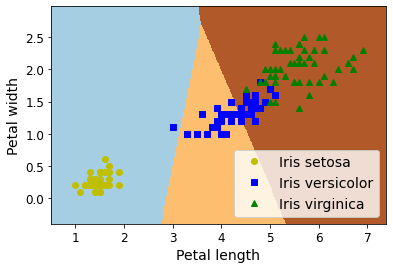

score:  0.95


In [16]:
###### YOUR CODE HERE
X = iris.data[:, 2:] # petal length and width
y = iris.target
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)
X_train, X_test, y_train, y_test = train_test_split(Xr, y, test_size=0.33, random_state=42)
log_reg_rot = LogisticRegression(random_state=0)
log_reg_rot.fit(Xr,y)
plot_logistic_regression(log_reg_rot,X,y)
print("score: ",log_reg_rot.score(X_train,y_train))


### Q3.3
1. Comment on the differences between the logistic regression and decision trees classifiers scores to the original and rotated data
2. Explain why that happened?

**Answer**
1. for the decision tree, after the rotation w get a higher accuracy. while for 
the logistic regression, there's not that much of a difference.

2. Rotating the data is a way of data augmentation to handle the issue of small datasets. It's a way to trick the model by giving it extra modified data. It worked on the decision tree case as it increased accuracy a little.

## Question 4 GridSearch

1. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

In [17]:
#loading the dataset then splitting features and target
moons=sklearn.datasets.make_moons(n_samples=10000, noise=0.4)
X=moons[0]
y=moons[1]

2. Split it into a training set and a test set using train_test_split().

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


3. Use grid search with cross-validation (with the help of the GridSearchCV class) to find best hyperparameter (max_depth, max_leaf_nodes, min_samples_split) values for a DecisionTreeClassifier. 
    - Choose reasonable values for each hyperparameter.
    - Apply GridSearch on a portion of training data.

In [19]:
#helpfl resource: https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/#h2_4
#applying it on a portion of training data (2000 samples)
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier(random_state=42, criterion='entropy')
tree_params={"max_depth":list(range(1, 10)),"max_leaf_nodes":list(range(2, 10)),"min_samples_split":list(range(2, 10))}
clf = GridSearchCV(tree, tree_params, cv = 10, scoring='accuracy')
clf.fit(X_train[0:2000], y_train[0:2000])
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2}
0.8485000000000001


4. Train it on the full training set using the best hyperparameters, and measure your model's performance on the test set.

In [20]:
#applying it on the whole of training data
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier(random_state=42, criterion='entropy')
tree_params={"max_depth":list(range(1, 10)),"max_leaf_nodes":list(range(2, 10)),"min_samples_split":list(range(2, 10))}
clf = GridSearchCV(tree, tree_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2}
0.8511940298507463


In [21]:
#measuring model's performance on the test set
clf.score(X_test,y_test)

0.8578787878787879

In [22]:
tree = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=9,min_samples_split=2,random_state=42, criterion='entropy')
tree.fit(X_train,y_train)
tree.score(X_test,y_test)

0.8578787878787879

## Question 4 Regression Tree

### Question
For the following plot of the two decision tree regressors:
1. Comment on the results
2. Which model has a higher variance error? why?
3. Which model has a higher bias error? why?

**Answer**

1. we can see that the higher the "max_depth" hyperparameter is, the more complex our model gets. It could be way too simple and underfit if the hyperparameter is small but it can overfit if we choose a large value for the hyperparameter.
2. the max_depth=5 model. because it appears that it overfits from the graph as it learns the data oints too much
3. the max_depth=2: model. because it appears to be less complex on the graph. it almost looks like underfitting.

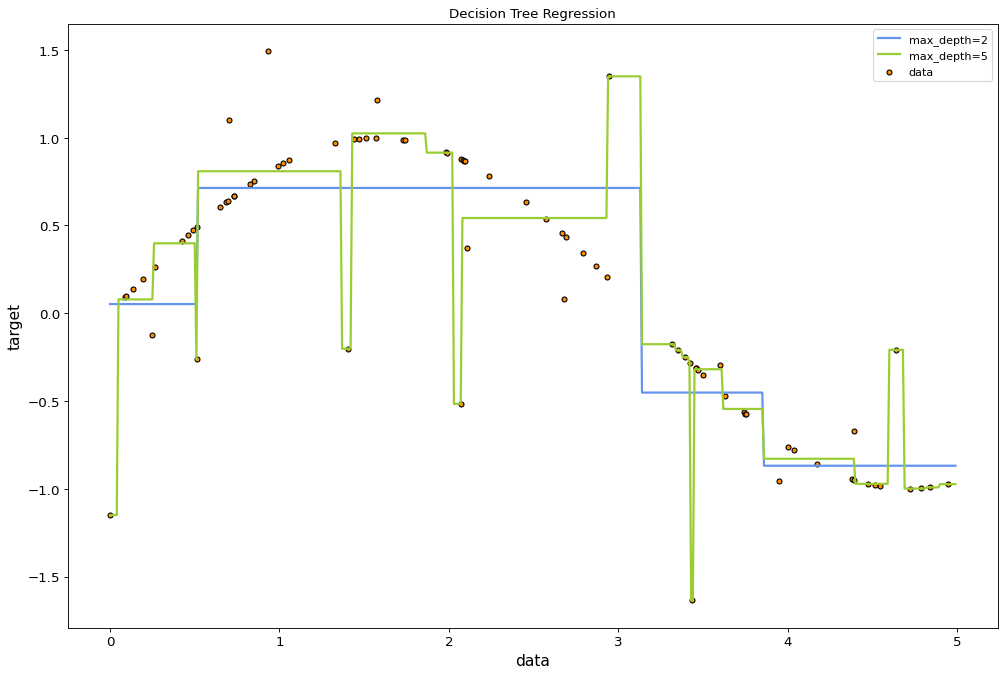

In [23]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15,10),dpi=80)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()